In [1]:
from pathlib import Path
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
DIR_NAME="uqpinn_bw_lam_sweep/uqpinn_1d_6_9_1_10"
run_name = Path("./uqpinn_runs")/ DIR_NAME

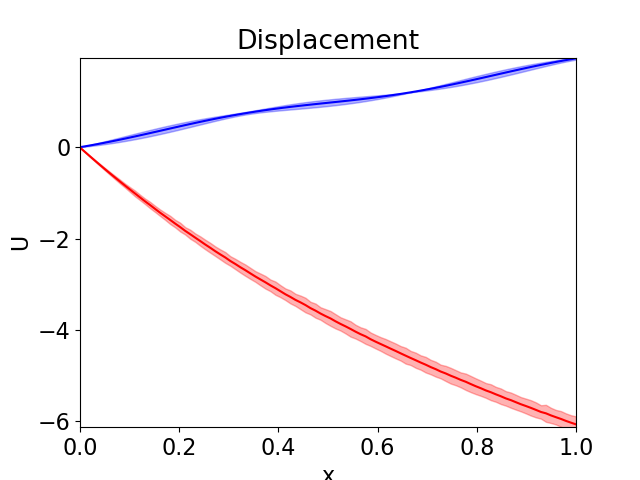

In [4]:
u_file_name = run_name/"U_displacement.png"
Image(u_file_name)

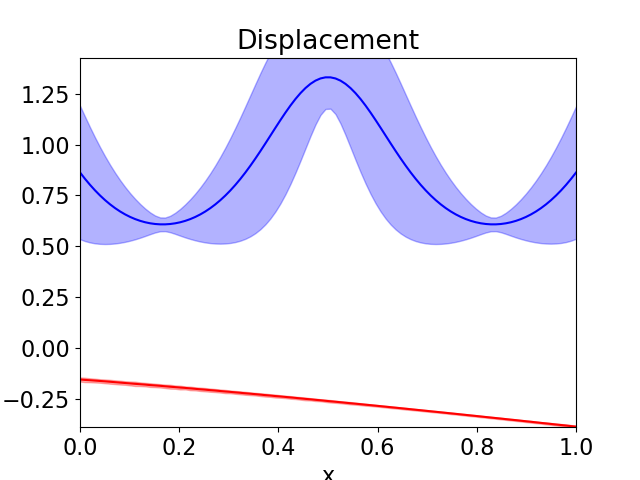

In [5]:
e_file_name = run_name/"E_displacement.png"
Image(e_file_name)

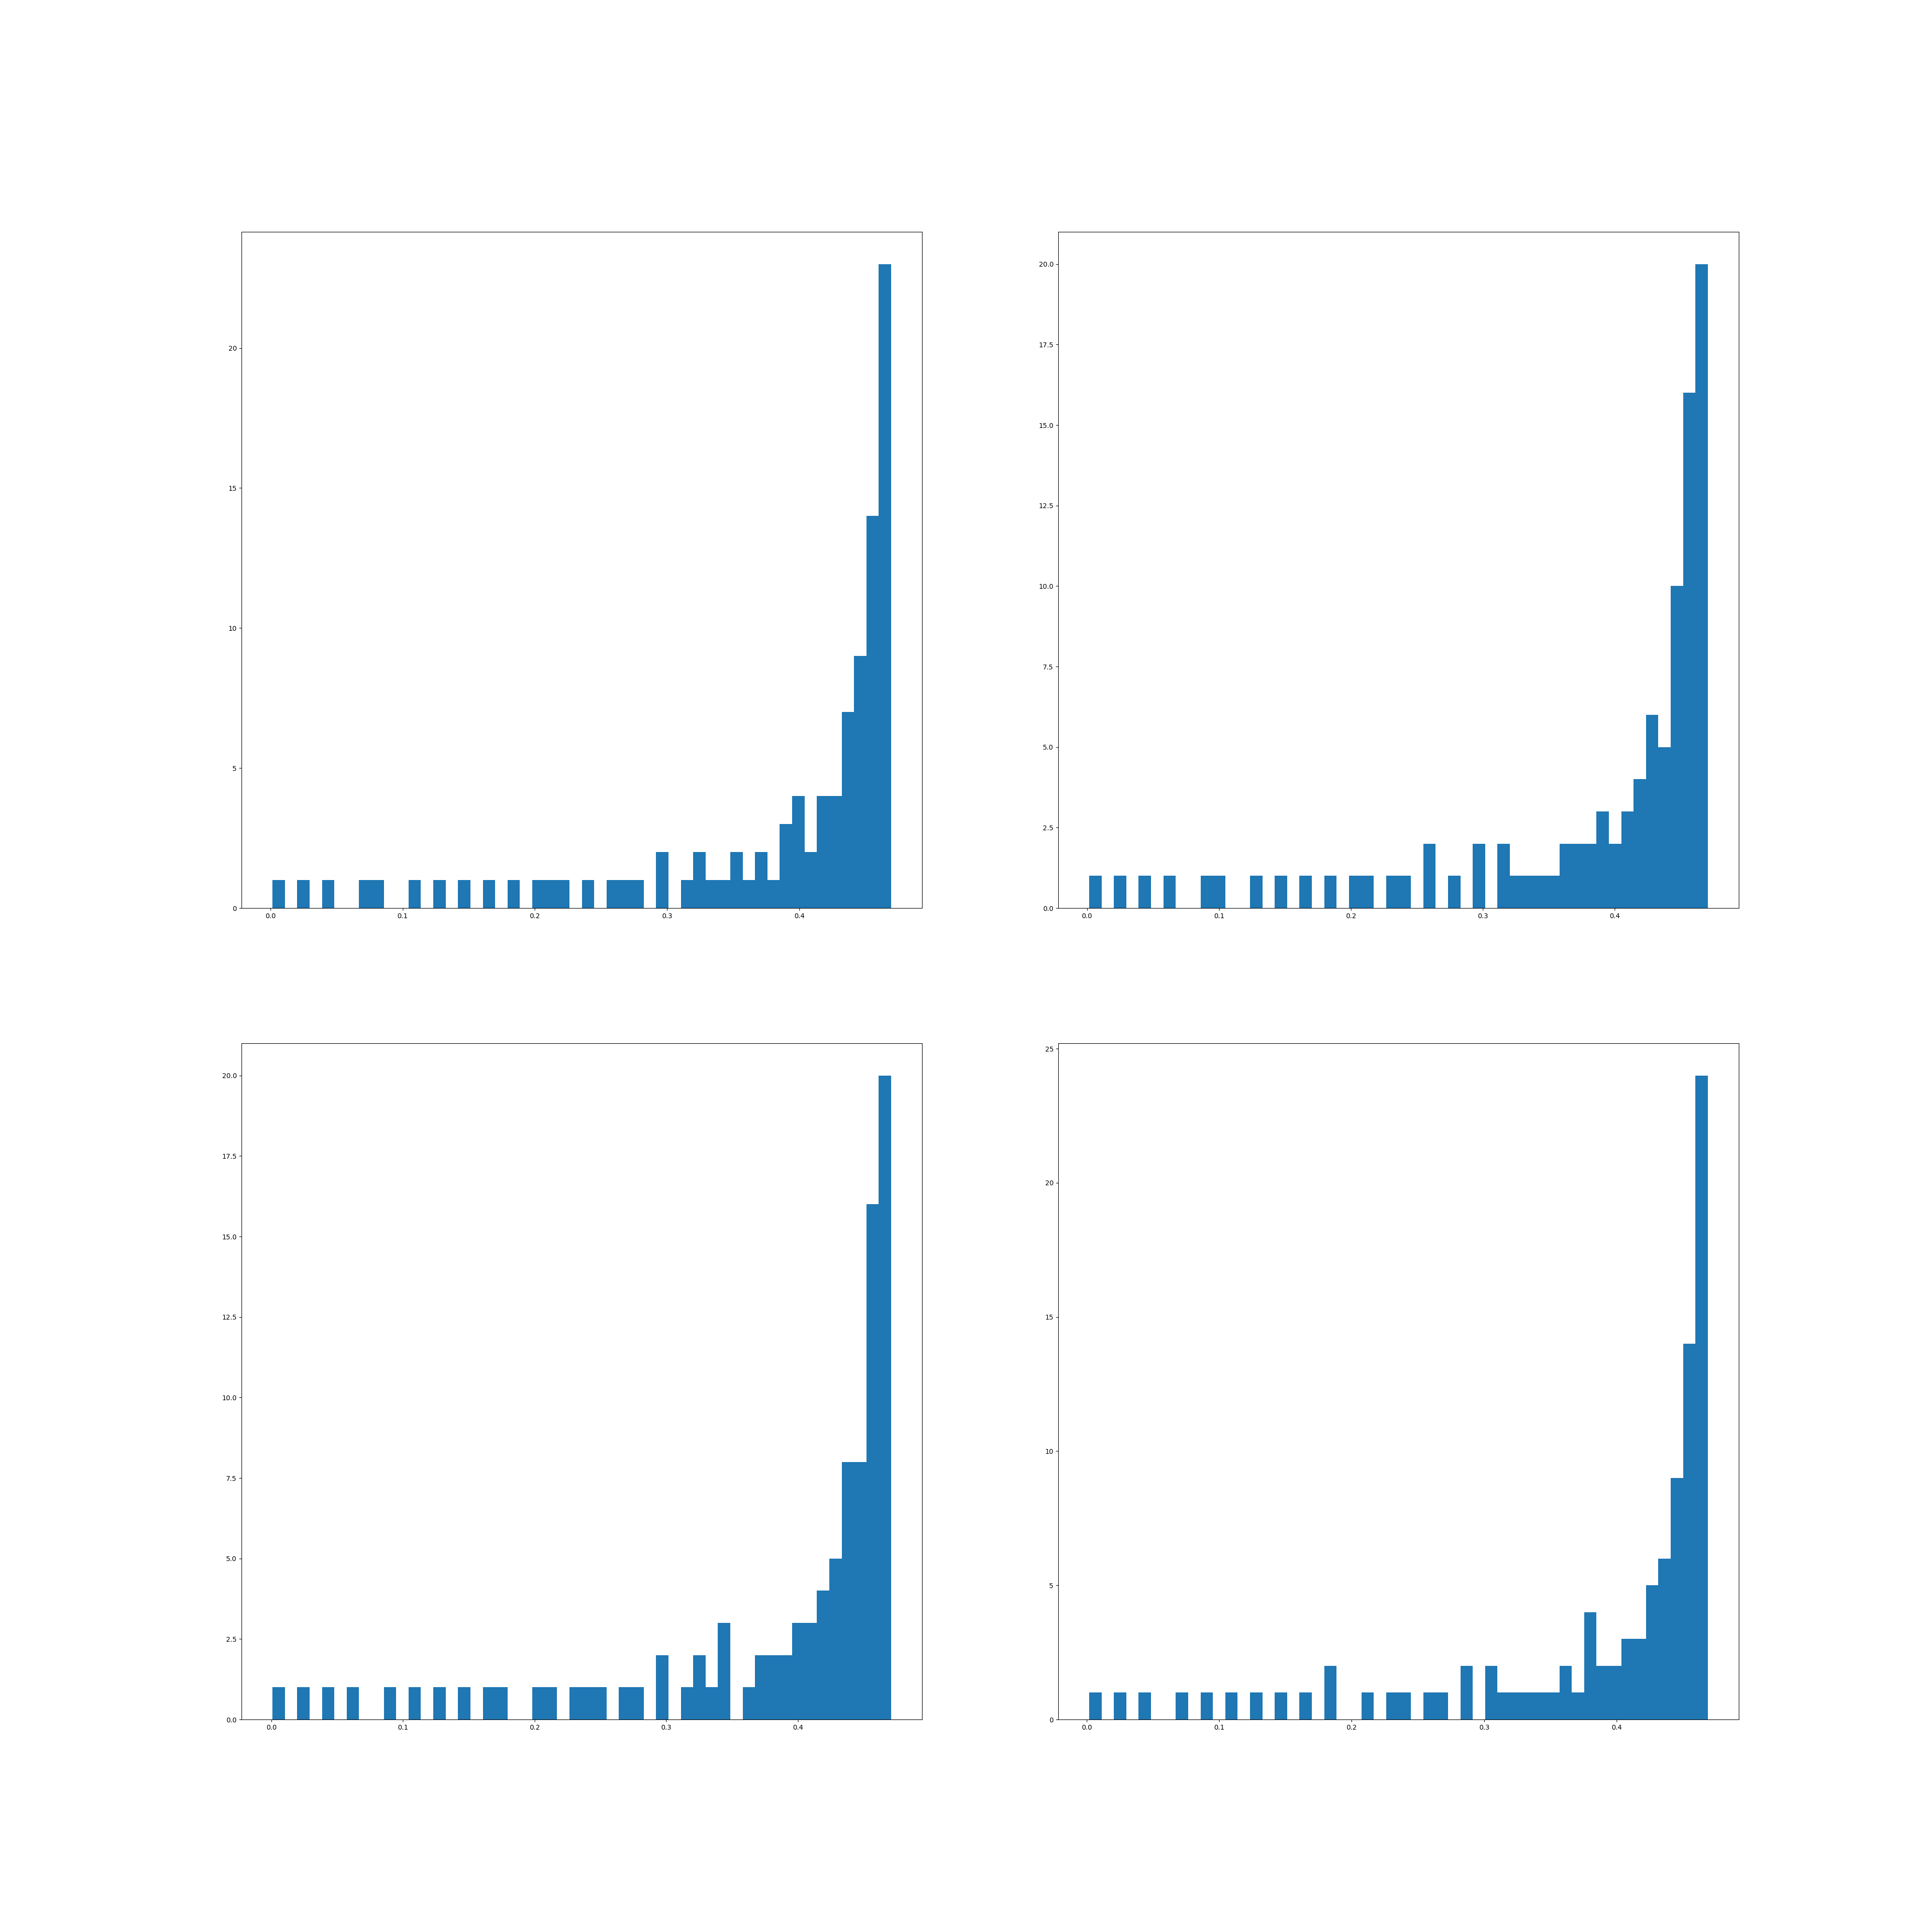

In [6]:
zfile_name = run_name/"z_histograms.png"
Image(zfile_name)

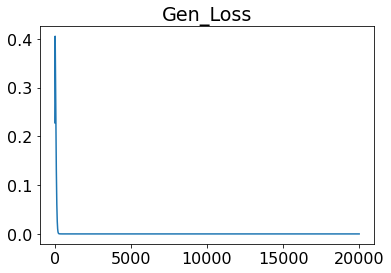

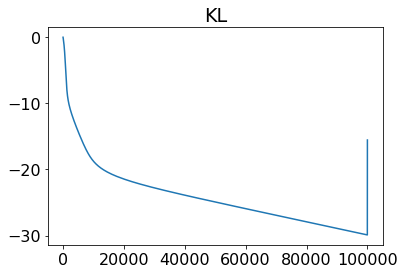

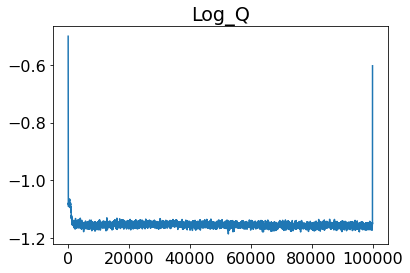

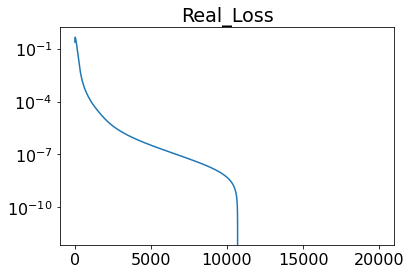

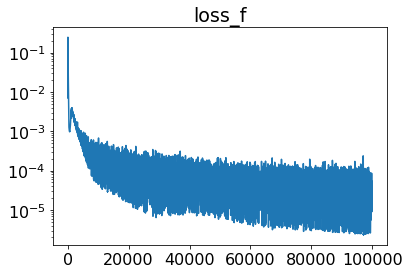

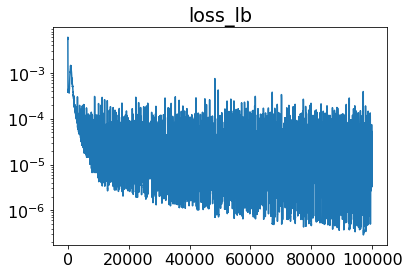

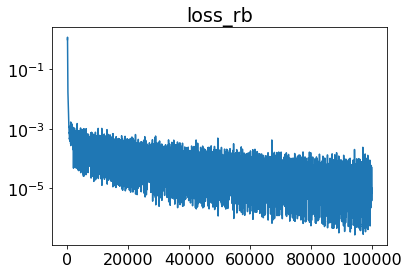

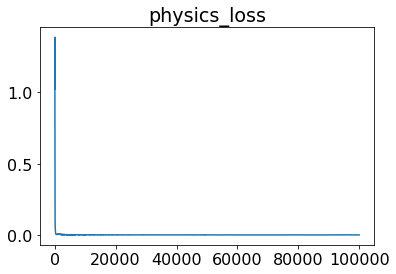

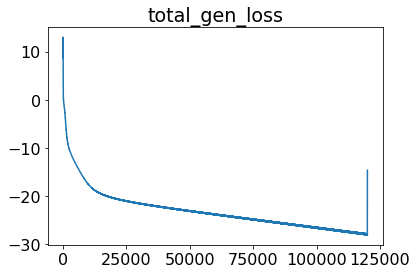

In [10]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
filename = Path("./uqpinn_runs")/ DIR_NAME/"logs/training_log.hdf5"
with h5py.File(filename, 'r') as fobj:
    for key,value in fobj["losses"].items():
        value=value[()]
        value=smooth(value,50)
        plt.figure()
        plt.title(key)
        if key =="time_per_step":
            value=value[25:]
            print(f"Avg Time {np.mean(value)}")
            steps = np.arange(len(value))
            plt.plot(steps,value)
            plt.plot(steps,np.full_like(steps,np.mean(value),dtype=float))
        else:
            steps = np.arange(len(value))
            plt.plot(steps,value)
        if key in ["Real_Loss","loss_f","loss_rb","loss_lb"]:
            plt.yscale("log")
        plt.show()

In [8]:
def plot_displacement_mean_std(X, f_mean,f_std,fake_samples, y_label, title):
    plt.rcParams.update({'font.size': 16})
    plt.xlim(0, np.max(X))
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel(y_label)
    g_mean = np.mean(fake_samples, axis=0)
    g_std = np.std(fake_samples, axis=0)
    std_mult = 2
    # Calculate mean and standard deviation

    # Plot mean and standard deviation
    plt.fill_between(np.squeeze(X), f_mean - (std_mult * f_std),
                     f_mean + (std_mult * f_std), alpha=0.3, color='b',
                     label='Target Std')
    plt.fill_between(np.squeeze(X), g_mean - (std_mult * g_std),
                     g_mean + (std_mult * g_std), alpha=0.3, color='r',
                     label='Generated Std')
    plt.plot(X, f_mean, 'b', label='Target Mean')
    plt.plot(X, g_mean, 'r', label='Generated Mean')

def load_big_test_dataset():
    filename = "data/test_data.hdf5"
    with h5py.File(filename, 'r') as fileObj:
        test_locs = fileObj["test_locs"][()]
        u_mean = fileObj["u_mean"][()]
        u_std = fileObj["u_std"][()]
        e_mean = fileObj["e_mean"][()]
        e_std = fileObj["e_std"][()]
        return test_locs, u_mean, u_std, e_mean, e_std

Output from step 5000
Output from step 10000
Output from step 15000


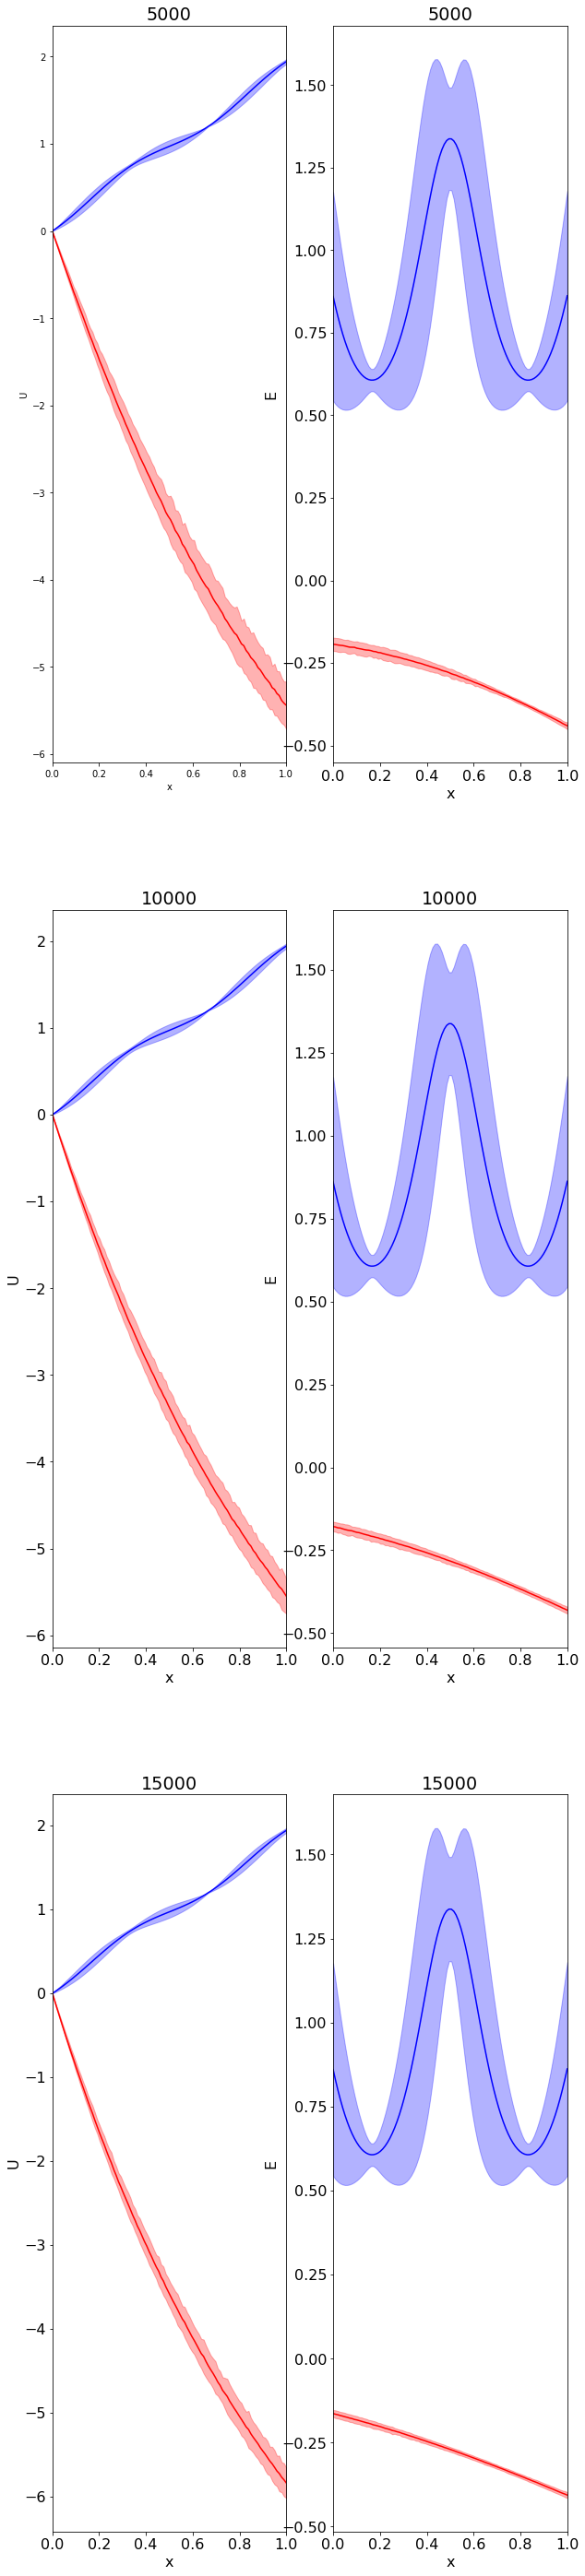

In [9]:
test_locs, u_mean, u_std, e_mean, e_std = load_big_test_dataset()
dirname = run_name /"ckpts/"
total_files= len(os.listdir(dirname))
fig = plt.figure(figsize=(10,50))
ct=1
for file in sorted(os.listdir(dirname),key=lambda ele: int(ele[:-5].split("_")[-1])):
    f_name = dirname / file 
    fig.add_subplot(total_files,2,ct)
    with h5py.File(f_name, 'r') as fobj:
        number =int(file[:-5].split("_")[-1])
        print(f"Output from step {number}")
        e= fobj["E"][()]
        u= fobj["U"][()]
        title=str(number)
        plot_displacement_mean_std(test_locs, u_mean, u_std, u,
                                  "U", title)
        fig.add_subplot(total_files,2,ct+1)
        plot_displacement_mean_std(test_locs, e_mean, e_std, e,
                                  "E", title)
        ct+=2